<div style="text-align: right">Bjanka Bašić, travanj 2019.</div>

# <div style="color:purple; text-align: center;"> VJEROJATNOST </div>

In [36]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
sp.init_printing()

from scipy import stats
from IPython.display import display
from IPython.display import Image

## <span style="color:purple"> 0. Uvod </span>

1814.godine Pierre-Simon Laplace je definirao vjerojatnost kao:

>*Vjerojatnost je... dakle, jednostavno razlomak čiji je brojnik broj povoljnih slučajeva i čiji je nazivnik broj mogućih slučajeva ... kada nas ništa ne navodi na očekivanje da se bilo koji od ovih slučajeva dogodi više puta nego bilo koji drugi.*

![Laplace](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG/180px-AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG)
<center><a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace">Pierre-Simon Laplace</a></center>


To je zapravo vrlo dobra definicija **vjerojatnosti**, još samo trebamo precizno odrediti što su slučajevi za određeni eksperiment te naravno što su povoljni slučajevi. Definirajmo:


- **Pokus:**
  Pojava s neizvjesnim ishodom koju možemo promatrati.
  <br>*Primjer: bacanje igraće kocke*
 
 
- **Ishod:**
  Rezultat pokusa. Nazivaju se i elementarni događaji.
  <br>*Primjer:* `3`


- **Prostor elementarnih događaja:**
  Skup svih ishoda nekog pokusa. 
  <br>*Primjer:* $ \Omega $ = `{1, 2, 3, 4, 5, 6}`


- **Događaj:**
  Podskup prostora elementarnih događaja koji imaju neko zajedničko svojstvo.
  <br>*Primjer:* `A={pao je paran broj}={2, 4, 6}`


- **Vjerojatnost:**
  Funkcija definirana na događajima.  Vjetojatnost će uvijek biti broj između 0 (nemogući događaj) te 1 (siguran događaj).
  <br>*Primjer, vjerojatnost događaja A je:* 
  $$ P(A)=\frac{\#A}{\#\Omega} = \frac{3}{6} = \frac{1}{2} $$
  
  Još jedan klasičan primjer pokusa je:

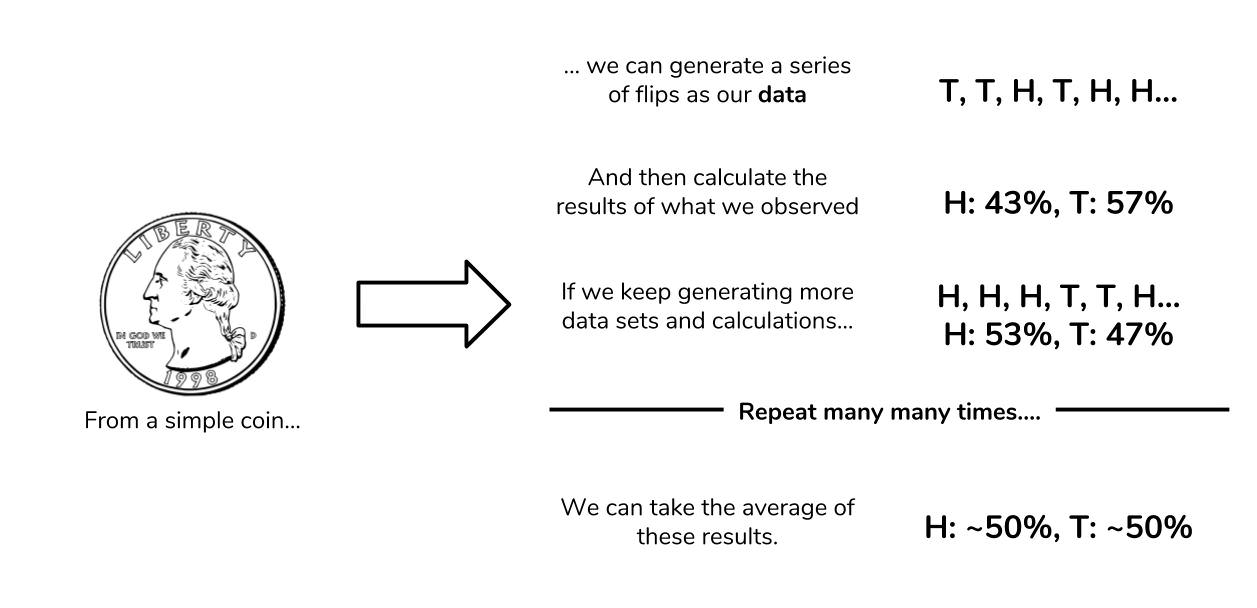

In [37]:
try:
    display(Image(filename = 'Primjer_pokusa.jpg', width = 600))
except FileNotFoundError:
    display(Image(url = 'https://i.imgur.com/GtbawRt.jpg'
                        'Primjer_pokusa.jpg', width = 600))

### <span style="color:purple"> Primjer: računanje vjerojatnosti korištenjem Pythona </span>

Koristeći definiciju koju je dao Laplace možemo jednostavno implementirati vjerojatnost pomoću Pythona.

In [38]:
from fractions import Fraction

def P(A, omega):
    return Fraction( len( A & omega ), len( omega ))

Probajmo sada ovu funkciju na primjeru pokusa bacanja igraće kocke sa šest strana. Kolika je vjerojatnost da je pri bacanju kocke pao paran broj?
Definirajmo prostor uzorka $ \Omega $ i događaj A pa izračunajmo vjerojatnost:

In [39]:
omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}

P(A, omega)

Fraction(1, 2)

No, ova funkcija je ograničena samo za računanje vjerojatnosti kada imamo skupove koji reprezentiraju događaje. Probajmo poboljšati funkciju tako da je događaj A zapravo predikat (npr.biti paran u ovom slučaju):

### <span style="color:purple"> Primjer: unaprijeđenje funkcije vjerojatnosti </span>

In [40]:
def P(A, omega): 
    if callable(A):
        A = zadovoljava(A, omega)
    return len( A & omega )/len( omega )

def zadovoljava(predikat, skup):
    return {a for a in skup if predikat(a)}

In [41]:
omega = {i for i in range(1,7)}
def A(x):
    return x%2==0

P(A,omega)

## <span style="color:purple"> 1. Vjerojatnost </span>

Neke osnovne tvrdnje:

* Uvjetna vjerojatnost:
$$
    P(B|A) = \frac{P(AB)}{P(A)} 
$$


* **Bayesovo pravilo**
$$
P(B_i|A) = \frac{P(A|B_i)P(B_i)}{P(A)}
= \frac{P(A|B_i)P(B_i)}{\sum_j P(AB_j)}
= \frac{P(A|B_i)P(B_i)}{\sum_j P(A|B_j)P(B_j)}
$$


* **Pravilo lanca**
$$P(A,B,C) = P(A) P(B|A) P(C|A,B)$$


   Poopćeno:
$$
\begin{align*}
P(X_1,\dots,X_n) &=
P(X_1)P(X_2|X_1)P(X_3|X_1,X_2)\cdots P(X_n|X_1,\dots,X_{n-1})\\
&= \prod_{k=1}^n P(X_k|X_1,\dots,X_{k-1})
\end{align*}
$$


## <span style="color:purple"> 2. Slučajne varijable </span>

* $X$ je slučajna varijabla


* **Diskretna slučajna varijabla**: $\{x_i\}$ su njezine vrijednosti i ima ih najviše prebrojivo, a njena vjerojatnosna funkcija gustoće i funkcija distribucije respektivno:
$$
\begin{align*}
f(x) & = P(X = x) \geq 0\\
F(x) & = P(X \leq x)
\end{align*}
$$
-----------------------------------------------------------------------------------------------------
* $(X,Y)$ je **slučajni vektor**


* Zajednička distribucija nad slučajnim vektorom $(X,Y)$: $$P(X=x,Y=y)\equiv P(x,y)$$


* **Pravilo zbroja**
$$P(x)=\sum_y P(x,y)$$
(To je zapravo marginalna vjerojatnost varijable $X$)

-----------------------------------------------------------------------------------------------------
* **Neprekidna slučajna varijabla**: koristeći oznake kao i kod diskretne, za funkciju gustoće vjerojatnosti i funkciju distribucije:
$$
\begin{align*}
f(x) & \geq 0\\
F(x) = \int_{-\infty}^{x} f(t)\,\textrm{d}t &\Rightarrow \int_{-\infty}^{\infty} f(t)\,\textrm{d}t = 1\\
P(a\leq X\leq b) &= \int_a^b f(x)\,\mathrm{d}x
\end{align*}
$$

### <span style="color:purple"> Najjednostavniji primjer: Bernoullijeva slučajna varijabla </span>

Imamo $X\sim B(1,p)$:
$$P(X=x)=
\begin{cases}
p, & \text{ako $x=1$}\\
1-p, & \text{inače}
\end{cases}
=f(x)
$$

Koristeći definiciju će biti: 
$$F(x)=
\begin{cases}
0, &  x<0 \\
1-p, & 0\leq x<1\\
1, & x\geq1
\end{cases}$$

Primjer Bernullijeve slučajne varijable bi bio $X$ baćeni novčić je ispao pismo. Tada je $p=0.5$.

Prikažimo njenu funkciju distribucije i za $p=0.25$ kako bi mogli usporediti:


In [42]:
def F(x, p): 
    if(x<0): 
        return 0
    elif(x<1):
        return 1-p
    else:
        return 1

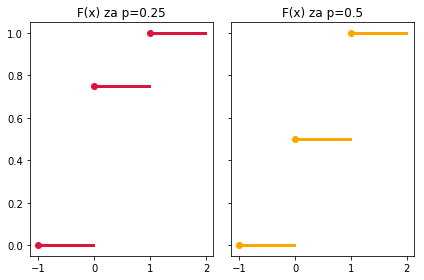

In [43]:
x1 = np.linspace(-1,0)[:-1]
x2 = np.linspace(0,1)[:-1]
x3 = np.linspace(1,2)[:-1]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.plot(x1,[F(i, 0.25) for i in x1], linewidth=3, color='crimson', marker='o', markevery=50)
ax1.plot(x2,[F(i, 0.25) for i in x2],linewidth=3, color='crimson', marker='o', markevery=50)
ax1.plot(x3,[F(i, 0.25) for i in x3],linewidth=3, color='crimson', marker='o', markevery=50)

ax2.plot(x1,[F(i, 0.5) for i in x1], linewidth=3, color='orange', marker='o', markevery=50)
ax2.plot(x2,[F(i, 0.5) for i in x2],linewidth=3, color='orange', marker='o', markevery=50)
ax2.plot(x3,[F(i, 0.5) for i in x3],linewidth=3, color='orange', marker='o', markevery=50)

ax1.set_title('F(x) za p=0.25')
ax2.set_title('F(x) za p=0.5')

fig.tight_layout()
plt.show()

### <span style="color:purple"> Primjer (diskretne): Binomna slučajna varijabla </span>

Imamo $X\sim B(n,p)$. Ona zapravo predstavlja zbroj $n$ Bernulijevih slučajnih varijabli pa imamo:
$$P(X=x)={n\choose k}p^kq^{n-k} = f(x), x\in\{0,...,n\}$$

Koristeći definiciju će biti: 
$$F(x)=
\begin{cases}
0, &  x<0 \\
\sum_{k=0}^x {n\choose k}p^kq^{n-k}, & k\leq x<k+1, k\in \{0,...,n-1\}\\
1, & x\geq n
\end{cases}$$

Primjer Binomne slučajne varijable bi bio kada bacamo novčić 10 puta je $X$ broj pisama. Tada je $p=0.5$ i $n=10$.

Prikažimo njenu funkciju gustoće i distribucije:

In [44]:
from functools import reduce
import operator as op

def zbroji(x,y):
    return x+y

def nCr(n,r):
    r = min(r, n-r)
    nazivnik = reduce(op.mul, range(n, n-r, -1), 1)
    brojnik = reduce(op.mul, range(1, r+1), 1)
    return nazivnik / brojnik

def fx(x, n, p):
    if(x<0 or x>n): 
        return 0
    return nCr(n,x) * ((p ** x) * ((1-p) ** (n-x)))

def FX(x, n, p): 
    if(x<0): 
        return 0
    elif(x<n):
        return reduce(zbroji,[fx(k, n, p) for k in range(0,x+1)])
    else:
        return 1

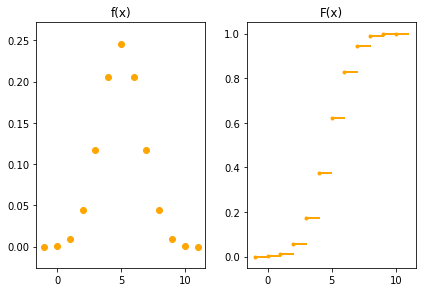

In [45]:
fig2, (ax3, ax4) = plt.subplots(1,2)
fig2.tight_layout()

d=np.arange(-1,12)
ax3.scatter(d,[fx(i, 10, 0.5) for i in d],color='orange')
for k in range(-1,11):
    x=np.linspace(k,k+1)[:-1]
    ax4.plot(x,[FX(int(np.floor(i)), 10, 0.5) for i in x], linewidth=2, color='orange', marker='.', markevery=50)

ax3.set_title('f(x)')
ax4.set_title('F(x)')

plt.show()

-------------------------------------------------------

Napravimo sada usporedbu tih funkcija za različite vrijednosti $n$-ova i $p$-ova:

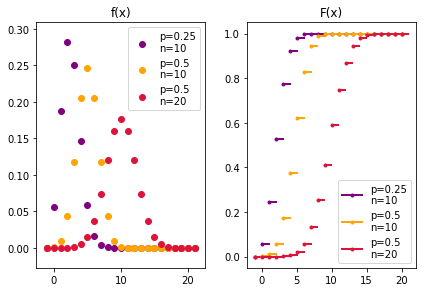

In [46]:
fig3, (ax5, ax6) = plt.subplots(1, 2)
fig3.tight_layout()

d=np.arange(-1,22)
ax5.scatter(d,[fx(i, 10, 0.25) for i in d],color='purple')
ax5.scatter(d,[fx(i, 10, 0.5) for i in d],color='orange')
ax5.scatter(d,[fx(i, 20, 0.5) for i in d],color='crimson')
for k in range(-1,21):
    x=np.linspace(k,k+1)[:-1]
    ax6.plot(x,[FX(int(np.floor(i)), 10, 0.25) for i in x], linewidth=2, color='purple', marker='.', markevery=50)
    ax6.plot(x,[FX(int(np.floor(i)), 10, 0.5) for i in x], linewidth=2, color='orange', marker='.', markevery=50)
    ax6.plot(x,[FX(int(np.floor(i)), 20, 0.5) for i in x], linewidth=2, color='crimson', marker='.', markevery=50)

ax5.legend(['p=0.25\nn=10','p=0.5\nn=10','p=0.5\nn=20'], loc=1)
ax6.legend(['p=0.25\nn=10','p=0.5\nn=10','p=0.5\nn=20'], loc=4)

ax5.set_title('f(x)')
ax6.set_title('F(x)')

plt.show()

### <span style="color:purple"> Primjer (neprekidne): Normalna slučajna varijabla </span>

Imamo $X\sim N(\mu,\sigma^2)$:
$$f(x)=\dfrac{1}{\sigma\sqrt{2\pi}}e^{\dfrac{-(x-\mu)^2}{2\sigma^2}}, x\in\mathbb{R}$$

Koristeći definiciju će biti:

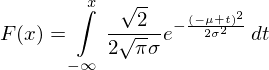

In [47]:
m, s, x, t = sp.symbols(r'\mu, \sigma, x, t')
F=sp.Function('F')
sp.Eq(F(x), sp.Integral(sp.S(1)/(s*sp.sqrt(2*sp.pi)) * sp.E**(sp.S(-(t-m)**2)/(2 * s**2)),(t, -sp.oo, x)))

Najčešće nailazimo na standarnu normalnu distibuciju gdje je $\mu=0$ i $\sigma^2=1$. Prikažimo njenu funkciju gustoće i distribucije:

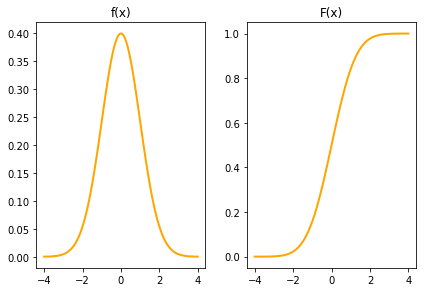

In [48]:
from scipy.stats import norm

fig4, (ax7, ax8) = plt.subplots(1, 2)
fig4.tight_layout()

x = np.linspace(-4, 4, 100)
ax7.plot(x, norm.pdf(x), linewidth=2, color='orange')
ax8.plot(x, norm.cdf(x), linewidth=2, color='orange')

ax7.set_title('f(x)')
ax8.set_title('F(x)')

plt.show()

-------------------------------------------------------

Napravimo sada usporedbu tih funkcija za različite vrijednosti $\mu$ i $\sigma$:

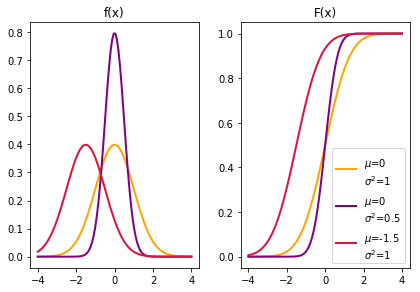

In [49]:
fig5, (ax9, ax10) = plt.subplots(1, 2)
fig5.tight_layout()

x = np.linspace(-4, 4, 100)
ax9.plot(x, norm.pdf(x), linewidth=2, color='orange')
ax9.plot(x, norm.pdf(x,0,0.5), linewidth=2, color='purple')
ax9.plot(x, norm.pdf(x,-1.5,1), linewidth=2, color='crimson')

ax10.plot(x, norm.cdf(x), linewidth=2, color='orange')
ax10.plot(x, norm.cdf(x,0,0.5), linewidth=2, color='purple')
ax10.plot(x, norm.cdf(x,-1.5,1), linewidth=2, color='crimson')

ax10.legend(['$\mu$=0\n$\sigma^2$=1','$\mu$=0\n$\sigma^2$=0.5','$\mu$=-1.5\n$\sigma^2$=1'], loc=4)

ax9.set_title('f(x)')
ax10.set_title('F(x)')

plt.show()

## <span style="color:purple"> 3. Matematičko očekivanje </span>

* **Očekivanje slučajne varijable** (prvo je za diskretnu, a drugo za neprekidnu):

$$ \mathbb{E}[X]=\sum_x x P(x) $$
$$\mathbb{E}[X]=\int_{-\infty}^{\infty} x\,p(x)\,\mathrm{d}x $$

* Korisna svojstva očekivanja, za $a,b\in\mathbb{R}$:

$$\mathbb{E}[f]=\sum_x f(x) P(x)$$
$$\mathbb{E}[aX+b] = a\mathbb{E}[X]+b$$
$$\mathbb{E}[X+Y] = \mathbb{E}[X] + \mathbb{E}[Y]$$

* Uvjetno očekivanje od $X$ uz dano $Y=y$:

$$\mathbb{E}[X|Y=y]=\sum_x x P(X=x|Y=y) $$

-----------------------------------------------------------------------------------------------

* **Varijanca slučajne varijable**:

$$\mathrm{Var}(X)= \mathbb{E}[(X-\mathbb{E}[X])^2]= \mathbb{E}[X^2] - \mathbb{E}[X]^2$$

* Korisno svojstvo, za $a,b\in\mathbb{R}$:

$$\mathrm{Var}(aX+b) = a^2\mathrm{Var}(X)$$

----------------------------------------------------------------------------------------------

* **Kovarijanca slučajnih varijabli**:

$$\mathrm{Cov}(X,Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])] =
\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]$$

* Još znamo označavati $\mathrm{Var}(X)=\sigma^2_{X}$ te $\mathrm{Cov}(X,Y)=\sigma_{X,Y}$ pa vrijedi $\mathrm{Cov}(X,X) =\mathrm{Var}(X) =\sigma^2_X$.


### <span style="color:purple"> Nastavak primjera: Binomna slučajna varijabla </span>

Izračunajmo matematičko očekivanje:

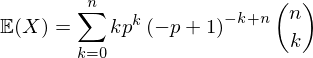

In [50]:
n, k, X = sp.symbols('n, k, X', positive=True, integer=True)
p = sp.Symbol('p', nonnegative=True)
E = sp.Function(r'\mathbb{E}')

formula = sp.Sum(k *( sp.binomial(n,k) * p**k * (-p+1)**(n-k)),(k,0,n))
sp.Eq(E(X), formula)

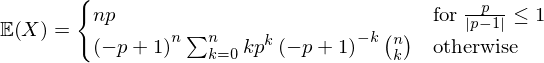

In [51]:
sp.Eq(E(X),formula.doit().simplify())

Zbog uvijeta na vjerojatnost, očekivanje će upravo biti:
$$\mathbb{E}(X)=np$$

Dok će varijanca:
$$\mathrm{Var}(X)=np(p-1)$$

## <span style="color:purple"> 4. Linearna zavisnost </span>

* **Pearsonov koeficijent korelacije**  - njime određujemo linearnu zavisnost među slučajnim varijablama:

$$ \rho_{X,Y} = \frac{\sigma_{X,Y}}{\sigma_X\sigma_Y}\in[-1,+1]$$

### <span style="color:purple"> Primjer: </span>

Konstruirajmo nekoliko različitih slučajnih varijabli te testirajmo njihovu međusobnu linearnu zavisnost:

In [52]:
X = np.random.random(100)
Y = np.random.binomial(20,0.5,100)
Z = np.random.normal(0,1,100)
W = [ X, X + 0.2 * Z, -3 * (X + 0.2 * Z), 0.5*Y, (X - 0.5)**2 + 0.05 * Z ]

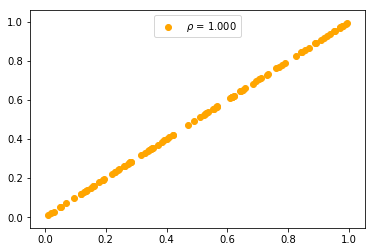

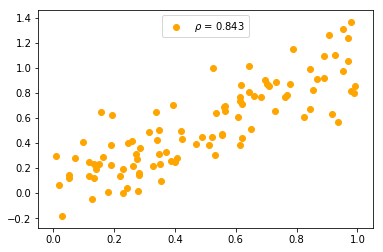

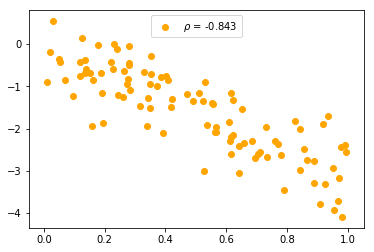

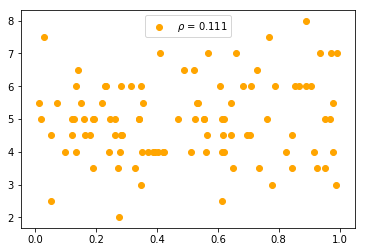

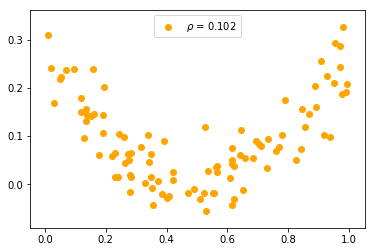

In [53]:
for i in range(0,5):
    fig, ax = plt.subplots()
    ax.scatter(X,W[i], label=r'$\rho$ = %.3f' % stats.pearsonr(X, W[i])[0], color='orange')
    ax.legend(loc=9)
    plt.show()

Kao što možemo primjetiti slučajna varijabla sama sa sobom će imati Pearsonov koeficijent 1 - u prijevodu totalna linearna zavisnost. Također sa zadnja dva grafa je očito da dvije skroz različite slučajne varijable mogu imati skoro iste Pearsonove koeficijente sa varijablom $X$. Iz toga bi netko mogao krivo zaključiti da su one linearno zavisne, no sa donjeg grafa primjetimo da su linearno nezavisne:

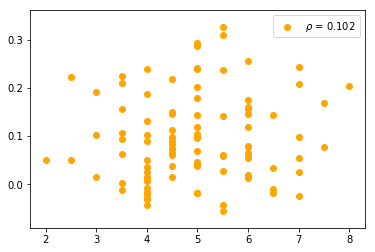

In [54]:
A = 0.5*Y
B = (X - 0.5)**2 + 0.05 * Z
fig, ax = plt.subplots()
ax.scatter(A, B, label=r'$\rho$ = %.3f' % stats.pearsonr(A, B)[0], color='orange')
ax.legend()
plt.show()

## <span style="color:purple"> 5. Opisna statistika </span>

Kao što je prikazano na slici koja prikazuje pokus bacanja novčića, iz ponavljanja nekog pokusa možemo dobiti vrijednost vjerojatnosti. Zato su podaci vrlo bitni i njihovim prikazom možemo zaključiti svašta - tu dolazi opisna statistika.

U nastavku ću prikazati svoju evidenciju dolazaka izviđača na aktivnosti:

In [96]:
evidencija = pd.read_excel('Evidencija.xlsx')
evidencija

,Član,16.1.,23.1.,30.1.,6.2.,13.2.,20.2.,23.2.,27.2.,6.3.,13.3.,20.3.,23.3.,27.3.
0,Bešić Hana,1,0,1,0,1,1,0,1,1,1,1,1,1
1,Đukić Luka,1,1,0,1,0,1,0,1,1,0,0,0,1
2,Đurić Pela,1,1,1,1,1,1,1,1,1,1,1,1,0
3,Horvatinčić Gabriela,1,1,1,1,1,1,1,1,1,1,1,0,1
4,Petrač Ivon,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Kokolić Lana,1,1,0,1,1,0,0,0,1,1,1,0,0
6,Kolar Luka,1,1,1,1,1,1,0,1,1,1,1,1,1
7,Popović Dina,1,1,1,1,1,1,0,1,1,1,0,1,0
8,Regušić Popović Arwen,0,0,0,1,1,1,0,1,0,1,1,0,0
9,Vondrak Liam,1,1,1,1,1,1,0,1,1,1,1,1,1


In [97]:
import xlrd

In [98]:
wb = xlrd.open_workbook('Evidencija.xlsx') 
sheet = wb.sheet_by_index(0)

podaci=[]
for i in range(1,14):
    tablica=[]
    for j in range(1,23):
        podatak= sheet.cell_value(j, i)
        tablica.append(podatak)
    podaci.append(tablica)

datumi = [sheet.cell_value(0,k+1) for k in range(13)]
članovi = [sheet.cell_value(k+1,0) for k in range(22)]

datumi, članovi

(['16.1.',
  '23.1.',
  '30.1.',
  '6.2.',
  '13.2.',
  '20.2.',
  '23.2.',
  '27.2.',
  '6.3.',
  '13.3.',
  '20.3.',
  '23.3.',
  '27.3.'],
 ['Bešić Hana',
  'Đukić Luka',
  'Đurić Pela',
  'Horvatinčić Gabriela',
  'Petrač Ivon',
  'Kokolić Lana',
  'Kolar Luka',
  'Popović Dina',
  'Regušić Popović Arwen',
  'Vondrak Liam',
  'Vukomirović Leonarda',
  'Zajec Grga',
  'Zajec Tonka',
  'Domjan Ivo',
  'Kikaš Mak',
  'Kolar Juraj',
  'Petrač Lorna',
  'Lovrović Nia',
  'Marić Ivona',
  'Radelić Lara',
  'Sokol Vito',
  'Trbojević Tara'])

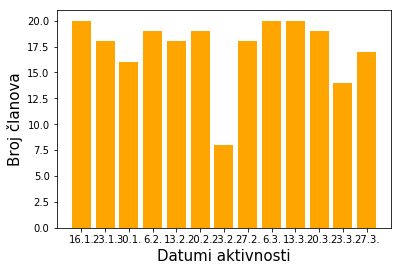

In [100]:
N=13
t=[i+1 for i in range (N)]

fig, ax = plt.subplots()

broj_clanova = [np.sum(podaci[k]) for k in range(N)]

ax.bar(t, broj_clanova, color='orange')

xn = [i+1 for i in range(N)]
ax.set_xticks(xn)
ax.set_xticklabels(datumi, fontsize=10)

plt.xlabel('Datumi aktivnosti', fontsize=15)
plt.ylabel('Broj članova', fontsize=15)

plt.show()



In [102]:
def obradi(lista):
    broj = 1
    print('Izbor:\n')
    print('1.Aritmetička sredina\n')
    print('2.Mod\n')
    print('3.Medijan\n')
    print('0.Kraj\n')
    lista.sort()
    while(broj):
        broj = int(input('Upišite broj onoga što želite:'))
        if(broj == 1):
            a_sredina = np.sum(lista)/len(lista)
            print('Aritmetička sredina je: %.3f\n' %a_sredina)
        elif(broj == 2):
            clan = lista[0]
            br = 1
            mx = 1
            mod = lista[0]
            for i in range(1,len(lista)):
                if(lista[i] == clan):
                    br = br+1
                else:
                    if(br > mx):
                        mx = br
                        mod = clan
                    br = 1
                    clan = lista[i]
            print('Mod je: %d\n' %mod)
        elif(broj == 3):
            medijan = lista[len(lista)//2]
            print('Medijan je: %d\n' %medijan)
        else:
            broj = 0
            
        
        

In [103]:
obradi(broj_clanova)

Izbor:

1.Aritmetička sredina

2.Mod

3.Medijan

0.Kraj

Upišite broj onoga što želite:1
Aritmetička sredina je: 17.385

Upišite broj onoga što želite:2
Mod je: 18

Upišite broj onoga što želite:3
Medijan je: 18

Upišite broj onoga što želite:0


--------------------------------------------
Sada ću napraviti statističku analizu po članovima:

In [104]:
podaci_z =[]
for i in range(1,23):
    tablica=[]
    for j in range(1,14):
        podatak_z = sheet.cell_value(i, j)
        tablica.append(podatak_z)
    podaci_z.append(tablica)

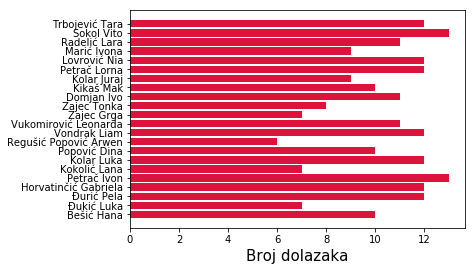

In [105]:
N=22
t=[i+1 for i in range (N)]

fig, ax = plt.subplots()

broj_dolazaka = [np.sum(podaci_z[k]) for k in range(N)]

ax.barh(t, broj_dolazaka, color='crimson')

yn = [i+1 for i in range(N)]
ax.set_yticks(yn)
ax.set_yticklabels(članovi, fontsize=10)

plt.xlabel('Broj dolazaka', fontsize=15)

plt.show()

In [106]:
obradi(broj_dolazaka)

Izbor:

1.Aritmetička sredina

2.Mod

3.Medijan

0.Kraj

Upišite broj onoga što želite:1
Aritmetička sredina je: 10.273

Upišite broj onoga što želite:2
Mod je: 12

Upišite broj onoga što želite:3
Medijan je: 11

Upišite broj onoga što želite:0


Na temelju ovih podataka bi mogla zaključiti da je dolaznost u prvom kvartalu bila dobra jer je medijan (11) vrlo blizu ukupnom broju aktivnosti (13).

Ako bi htjela prikazati si u tablici ukupnu dolaznost:

In [115]:
evidencija['Ukupno'] = evidencija[datumi[0]]
for i in range(1,13):
    evidencija['Ukupno'] = evidencija['Ukupno'] + evidencija[datumi[i]]
evidencija

,Član,16.1.,23.1.,30.1.,6.2.,13.2.,20.2.,23.2.,27.2.,6.3.,13.3.,20.3.,23.3.,27.3.,Ukupno
0,Bešić Hana,1,0,1,0,1,1,0,1,1,1,1,1,1,10
1,Đukić Luka,1,1,0,1,0,1,0,1,1,0,0,0,1,7
2,Đurić Pela,1,1,1,1,1,1,1,1,1,1,1,1,0,12
3,Horvatinčić Gabriela,1,1,1,1,1,1,1,1,1,1,1,0,1,12
4,Petrač Ivon,1,1,1,1,1,1,1,1,1,1,1,1,1,13
5,Kokolić Lana,1,1,0,1,1,0,0,0,1,1,1,0,0,7
6,Kolar Luka,1,1,1,1,1,1,0,1,1,1,1,1,1,12
7,Popović Dina,1,1,1,1,1,1,0,1,1,1,0,1,0,10
8,Regušić Popović Arwen,0,0,0,1,1,1,0,1,0,1,1,0,0,6
9,Vondrak Liam,1,1,1,1,1,1,0,1,1,1,1,1,1,12


A tko su bili najbolji članovi po dolascima:

In [116]:
evidencija.sort_values('Ukupno', ascending=False).head(5)[['Član']]

,Član
4,Petrač Ivon
20,Sokol Vito
21,Trbojević Tara
2,Đurić Pela
3,Horvatinčić Gabriela
